In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import os
import sklearn as sk
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from __future__ import print_function
from time import time
from matplotlib import cm

In [99]:
#Cell copy pasted from stackexchange.

n_samples = 2000
n_features = 2000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [3]:
sns.set(style="darkgrid")

In [4]:
filename = "Data/lexicons/druglexiconrevised.json"
file = open(filename, encoding="utf-8")
drugs=json.load(file)
file.close()

In [5]:
filename = "Data/lexicons/bodypartlexicon.json"
file = open(filename, encoding="utf-8")
parts=json.load(file)

In [6]:
filename = "Data/lexicons/roalexicon.json"
file = open(filename, encoding="utf-8")
roas=json.load(file)

In [20]:
dates = pd.date_range(start="1/1/2016", periods=15, freq="MS")

In [21]:
def create_tokens():
    tokenList = []
    for body in df["body"]:
        tokens = word_tokenize(body.lower())
        tokenList.append(tokens)
    return tokenList

In [22]:
frames = []
for i in range(9):
    newf = pd.read_json("Data/2016/opcomments2016-0" + str(1+i), encoding="utf-8")
    newf["date"]= [dates[i] for row in newf.iterrows()]
    frames.append(newf)
for i in range(3):
    newf = pd.read_json("Data/2016/opcomments2016-" + str(10+i), encoding="utf-8")
    newf["date"]= [dates[9+i] for row in newf.iterrows()]
    frames.append(newf)
for i in range(3):
    newf = pd.read_json("Data/2017/opcomments2017-0" + str(1+i), encoding="utf-8")
    newf["date"]= [dates[12+i] for row in newf.iterrows()]
    frames.append(newf)
df = pd.concat(frames)

In [25]:
df = df.reset_index(drop=True)

In [26]:
tf = tf_vectorizer.fit_transform(df["body"])

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df["body"])

In [28]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [38]:
#nmf = NMF(n_components=n_components, random_state=1,
#          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
#          l1_ratio=.5).fit(tfidf)

In [29]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: codeine spaceedge opium lean wiki promethazine wikipedia https otc pharma org en opieandanthony posts bulgakov mikhail carfentanil reason online uk
Topic #1: addiction people don use just need drugs make life think drug things want does medical doesn help like addictive person
Topic #2: pain morphine doctor surgery doctors prescribed hospital meds patient patients didn gave chronic hydrocodone er given prescription oxycodone years day
Topic #3: just like ve really oxy don know time good got day shit feel years think life going methadone ll did
Topic #4: test que la weed meth cocaine narco el en syrup cough alcohol xanax mdma lsd hydrocodone adderall coke los valium
Topic #5: time got left norco went hours home night little did later didn day took said room water old like came
Topic #6: kratom dose high morphine methadone opiates like opiate tolerance heroin opioid withdrawal use effects day ve opioids doses taking just
Topic #7: people heroin fentanyl drug drugs like know met

In [30]:
topic_names = ["Posts by bot", "Drugs in society", "Medical/morphine", "Personal", 
          "Multiple drugs", "Miscellaneous", "Withdrawal and/or prescription opiates", 
          "Talking about addicts", "Quantitative drug use talk", "Links and social media"]
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()
#print_top_words(nmf, tfidf_feature_names, n_top_words)

In [31]:
number = 10012

In [32]:
doc_topic_dist_unnormalized = np.matrix(lda.transform(tf[number]))
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)

In [38]:
sizes = np.squeeze(np.asarray(doc_topic_dist))

In [34]:
df = df.reset_index(drop=True)

In [35]:
df.at[number, "body"]

'I do drink a decent amount. In between my two fails though my levels were 21, 54, 73, and then i failed at 18.4 again. Looking through past ones with my counselor I was anywhere from 40-150. The problem is that my teeth suck. I\'ve had 2 abscesses this month and I\'m scared to drink anything but water.The pain is insane. I don\'t care what anyone says, I used heroin for 5 years with the same habits (actually worse obviously.) Methadone rots MY teeth. Maybe not yours, but definitley mine. Why would it be such a common "Myth," my dentist wanted to charge me $10,009 dollars and I had to just get rid of the abcesses and ignore it. 2 extractions, 6 crowns, and more than half of my mouth needed "something." You can just look at my mouth and see it\'s fucked up. I got a second opinion from aspen dental and they said $24,000! \n\nMethadone sucks. It saved my life, but it was a last resort. I was going to federal prison if I couldnt get clean then and there. Subs never worked for me and I spen

In [39]:
sizes

array([0.00135141, 0.00135174, 0.10051045, 0.54466547, 0.00135144,
       0.16466307, 0.00135177, 0.16134067, 0.00135185, 0.02206213])

<IPython.core.display.Javascript object>


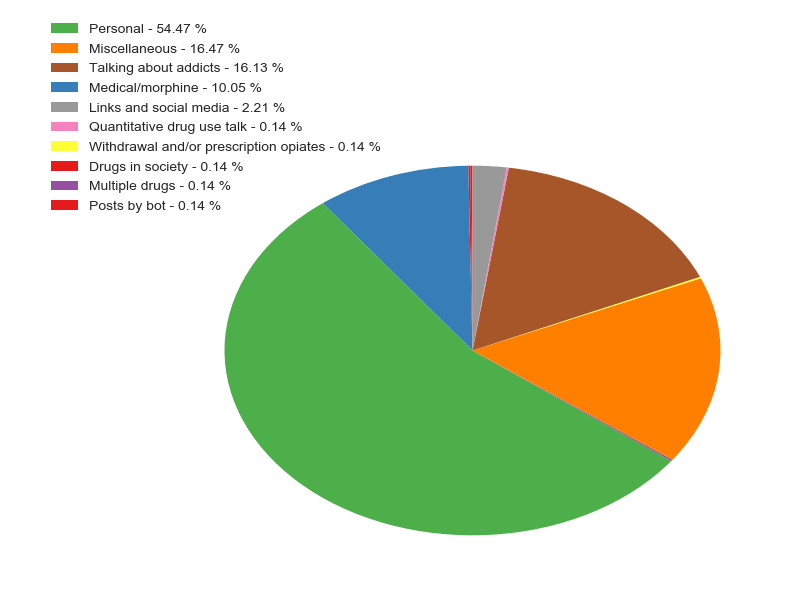

In [41]:
fig1, ax1 = plt.subplots()
sizes = np.squeeze(np.asarray(doc_topic_dist))
cs=cm.Set1(np.arange(10)/10.)
patches, texts = ax1.pie(sizes, colors=cs, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j * 100) for i,j in zip(topic_names, sizes)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, .9),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [55]:
topic_bd = []
for tf_row in tf:
    doc_topic_dist_unnormalized = np.matrix(lda.transform(tf_row))
    doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)
    doc_topic_dist = np.squeeze(np.asarray(doc_topic_dist))
    topic_bd.append(doc_topic_dist)

In [62]:
topics = pd.DataFrame(topic_bd)
topics.columns = ["Posts by bot", "Drugs in society", "Medical/morphine", "Personal", 
          "Multiple drugs", "Miscellaneous", "Withdrawal and/or prescription opiates", 
          "Talking about addicts", "Quantitative drug use talk", "Links and social media"]

In [67]:
df = pd.concat([df, topics], axis=1)

In [90]:
psn = df[df["Personal"] > .5].reset_index(drop=True)
unpsn = df[df["Personal"] < .2].reset_index(drop=True)

In [89]:
psn.loc[10,"body"]

'Not sure about that, but I have a few friends that were freshman on that team who said Colt had a pretty major Oxy habit and over did it on the **day of** the game, he had to basically be dragged from his hotel room. '

In [91]:
unpsn.loc[10,"body"]

"That's pretty much it--they don't want people on long term opiates to kill their liver with the APAP. Also because a lot of people have liver problems, and plain oxy or hydrocodone is safer for them. "

In [94]:
dr = df[(df["Personal"] > .5) & (df["Quantitative drug use talk"] > .1)].reset_index(drop=True)

In [98]:
dr.loc[2, "body"]

"I drove through Baltimore over the weekend.  Accidently bought some crack at my first attempt.  it wasn't a lot of money, but i would have rather not bought any coke/rock.   then found the cool dude with the gel caps of scramble. the local dope cut.   and yeah. everything was top notch.\n\na few days before that, i cold copped in richmond.  i had to find a black guy to go to the dope spot for me.. cuz..   whiteboy problems.  and that stuff wasn't anything to write home about. but it helped solve my hangover n make me not sick.\n\ni get back home, and no one has anything. ive been hurting for days. all i had was a morph 100 since sunday.  til today.  got some pink oxy 10's. and my friend finally showed up n paid me back for a few morphs i gave him 2 weeks ago. he handed me a 25 mcg/hr patch.   happiness."

<IPython.core.display.Javascript object>


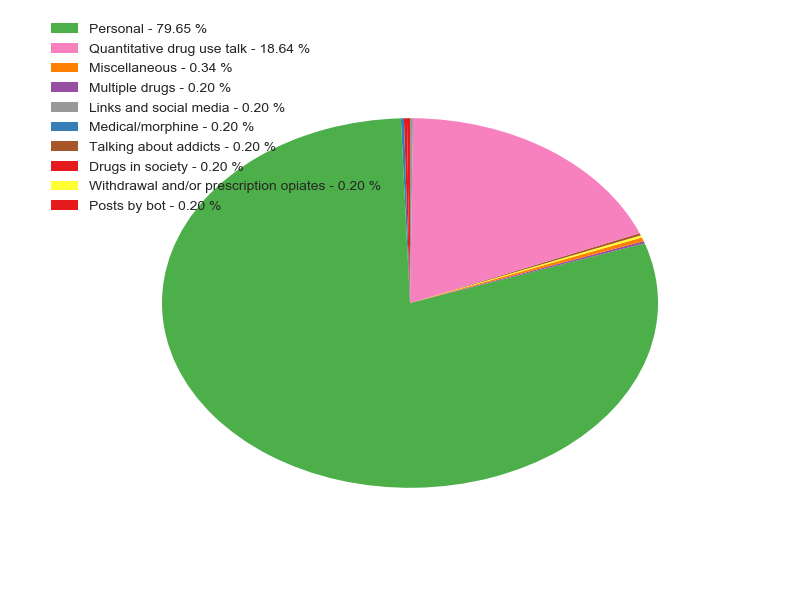

In [103]:
fig1, ax1 = plt.subplots()
sizes = dr.loc[2,["Posts by bot", "Drugs in society", "Medical/morphine", "Personal", 
          "Multiple drugs", "Miscellaneous", "Withdrawal and/or prescription opiates", 
          "Talking about addicts", "Quantitative drug use talk", "Links and social media"]]
cs=cm.Set1(np.arange(10)/10.)
patches, texts = ax1.pie(sizes, colors=cs, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j * 100) for i,j in zip(topic_names, sizes)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, .9),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


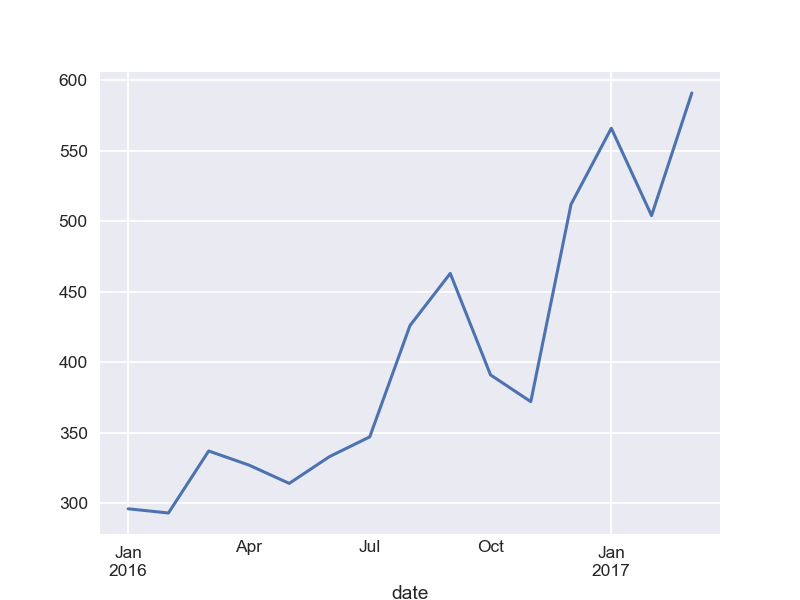

<IPython.core.display.Javascript object>


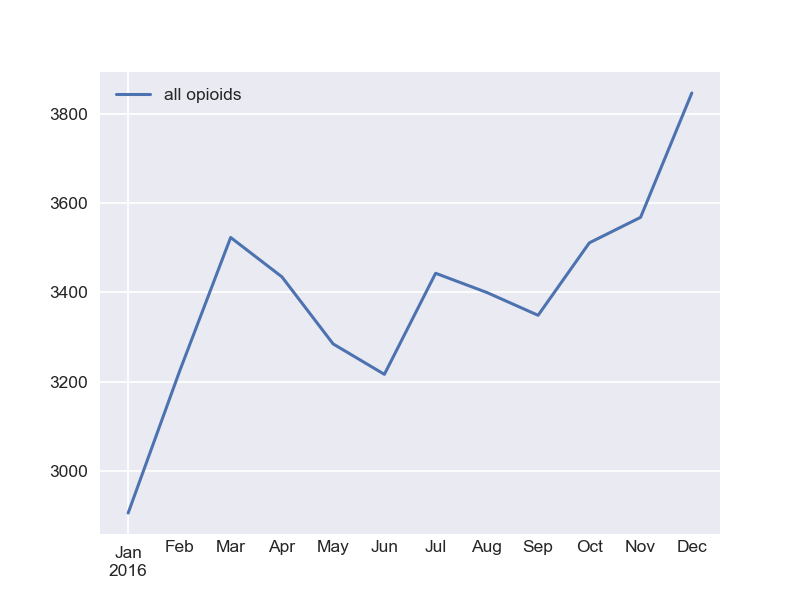

'\nax=fig.add_subplot(111, label="1")\nax2=fig.add_subplot(111, label="2", frame_on=False)\n\nax.plot(dates, op_od, color="C0")\nax.set_ylabel("Personal comments mentioning opioid drug use", color="C0")\nax.tick_params(axis=\'y\', colors="C0")\n\n\nax2.yaxis.tick_right()\nax2.xaxis.tick_top()\nax2.xaxis.set_major_locator(plt.NullLocator())\ny1, y2= ax.get_ylim()\nax2.set_ylim([y1,y2])\nax2.set_ylabel(\'Deaths to opioids\', color="C1")\nax2.yaxis.set_label_position(\'right\')\nax2.tick_params(axis=\'y\', colors="C1")\nax.plot(dates, dr.groupby("date").size(), color="C1")\nplt.title("Comments vs. Death: All Opioids")\n'

In [137]:
op_od = pd.DataFrame()
op_od["all opioids"] =[2907,3223,3523,3435,3285,3217,3443,3400,3349,3511,3568,3846, np.nan, np.nan, np.nan]
op_od.index = pd.date_range(start="1/1/2016", periods=15, freq="MS")
plt.figure()
dr.groupby("date").size().plot()
op_od.plot()
'''
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dates, op_od, color="C0")
ax.set_ylabel("Personal comments mentioning opioid drug use", color="C0")
ax.tick_params(axis='y', colors="C0")


ax2.yaxis.tick_right()
ax2.xaxis.tick_top()
ax2.xaxis.set_major_locator(plt.NullLocator())
y1, y2= ax.get_ylim()
ax2.set_ylim([y1,y2])
ax2.set_ylabel('Deaths to opioids', color="C1")
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="C1")
ax.plot(dates, dr.groupby("date").size(), color="C1")
plt.title("Comments vs. Death: All Opioids")
'''